In [28]:
library(tidyverse)
library(ggpubr)
library(rstatix)

data("selfesteem", package = "datarium")
head(selfesteem, 3)
baseline=c( 0.152 , 0.461 , 0.256 , 0.164, 0.34 )
BT = c(  0.160 , 0.435,   0.222,  0.141,  0.42 )
ADV = c(  0.149, 0.432,  0.226, 0.133, 0.384 )
INLP = c( 0.154 ,  0.456, 0.247,  0.172,   0.414)
ID=c(1,2,3,4,5)


baseline<-c(baseline, 0.477)
BT<-c(BT, 0.275)
ADV<-c(ADV, 0.263)
INLP<-c(INLP,30.3)
ID<-c(ID,6)

id,t1,t2,t3
1,4.005027,5.182286,7.107831
2,2.558124,6.912915,6.308434
3,3.244241,4.443434,9.778410


In [29]:
debias<-data.frame(ID, baseline, BT, ADV, INLP)
head(debias)

ID,baseline,BT,ADV,INLP
1,0.152,0.160,0.149,0.154
2,0.461,0.435,0.432,0.456
3,0.256,0.222,0.226,0.247
4,0.164,0.141,0.133,0.172
5,0.340,0.420,0.384,0.414
6,0.477,0.275,0.263,30.300


In [30]:
debias <- debias %>%
  gather(key = "technique", value = "DTO", baseline,	BT,	ADV,	INLP) %>%
  convert_as_factor(ID, technique)
head(debias, 3)

selfesteem <- selfesteem %>%
  gather(key = "time", value = "score", t1, t2, t3) %>%
  convert_as_factor(id, time)
head(selfesteem, 3)

ID,technique,DTO
1,baseline,0.152
2,baseline,0.461
3,baseline,0.256


id,time,score
1,t1,4.005027
2,t1,2.558124
3,t1,3.244241


In [31]:
debias %>%
  group_by(technique) %>%
  get_summary_stats(DTO, type = "common")
selfesteem %>%
  group_by(time) %>%
  get_summary_stats(score, type = "common")

technique,variable,n,min,max,median,iqr,mean,sd,se,ci
ADV,DTO,6,0.133,0.432,0.244,0.186,0.264,0.122,0.050,0.128
baseline,DTO,6,0.152,0.477,0.298,0.244,0.308,0.142,0.058,0.149
BT,DTO,6,0.141,0.435,0.248,0.208,0.276,0.127,0.052,0.133
INLP,DTO,6,0.154,30.300,0.330,0.255,5.290,12.253,5.002,12.858


time,variable,n,min,max,median,iqr,mean,sd,se,ci
t1,score,10,2.046,4.005,3.212,0.571,3.140,0.552,0.174,0.395
t2,score,10,3.908,6.913,4.601,0.890,4.934,0.863,0.273,0.617
t3,score,10,6.308,9.778,7.463,1.740,7.636,1.143,0.361,0.817


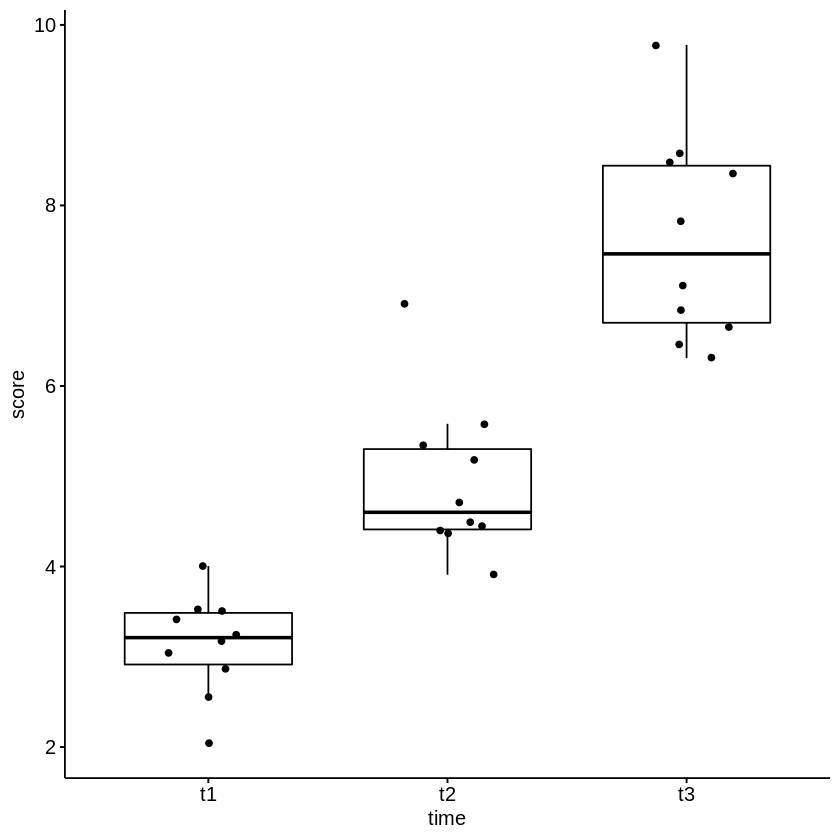

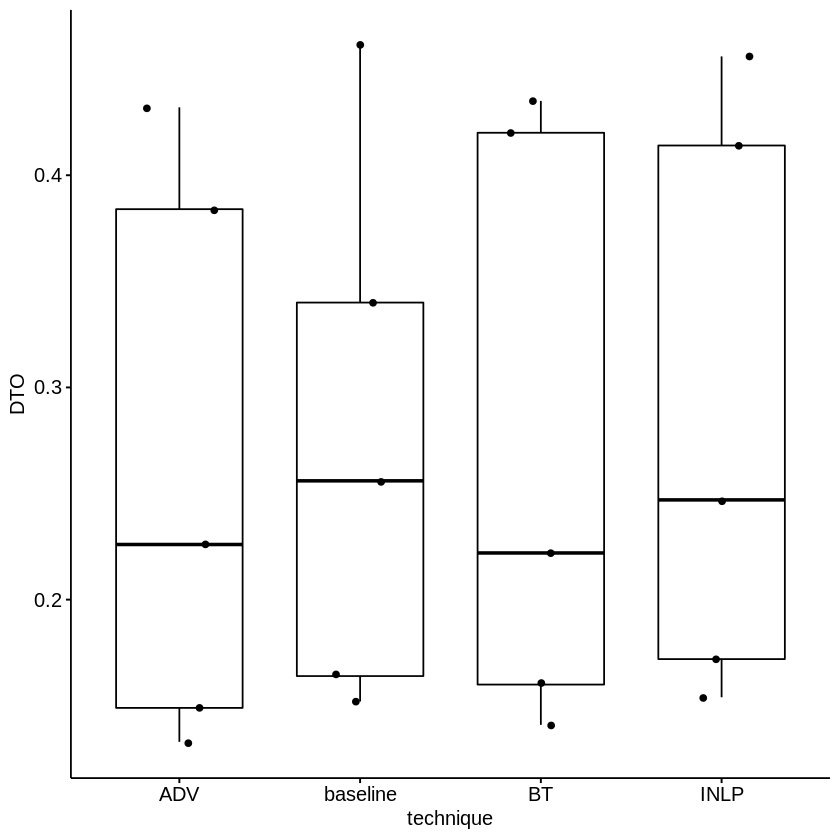

In [22]:
ggboxplot(selfesteem, x = "time", y = "score", add = "jitter")
ggboxplot(debias, x = "technique", y = "DTO", add = "jitter")

In [32]:
res.fried <- selfesteem %>% friedman_test(score ~ time |id)
res.fried
res.fried <- debias %>% friedman_test(DTO ~ technique |ID)
res.fried

.y.,n,statistic,df,p,method
score,10,18.2,2,0.0001116658,Friedman test


.y.,n,statistic,df,p,method
DTO,6,7.8,3,0.0503311,Friedman test


In [33]:
selfesteem %>% friedman_effsize(score ~ time |id)
debias %>% friedman_effsize(DTO ~ technique |ID)

.y.,n,effsize,method,magnitude
score,10,0.91,Kendall W,large


.y.,n,effsize,method,magnitude
DTO,6,0.4333333,Kendall W,moderate


In [42]:
library(xtable)

In [44]:
pwc <- selfesteem %>%
  wilcox_test(score ~ time, paired = TRUE, p.adjust.method = "bonferroni")
pwc
pwc <- debias %>%
  wilcox_test(DTO ~ technique, paired = TRUE, p.adjust.method = "bonferroni")
pwc
print(xtable(pwc, type = "latex"), file = "/tmp/filename2.tex")

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
score,t1,t2,10,10,0,0.002,0.006,**
score,t1,t3,10,10,0,0.002,0.006,**
score,t2,t3,10,10,1,0.004,0.012,*


.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
DTO,ADV,baseline,6,6,5,0.313,1.000,ns
DTO,ADV,BT,6,6,2,0.094,0.563,ns
DTO,ADV,INLP,6,6,0,0.031,0.188,ns
DTO,baseline,BT,6,6,15,0.438,1.000,ns
DTO,baseline,INLP,6,6,6,0.438,1.000,ns
DTO,BT,INLP,6,6,3,0.141,0.846,ns


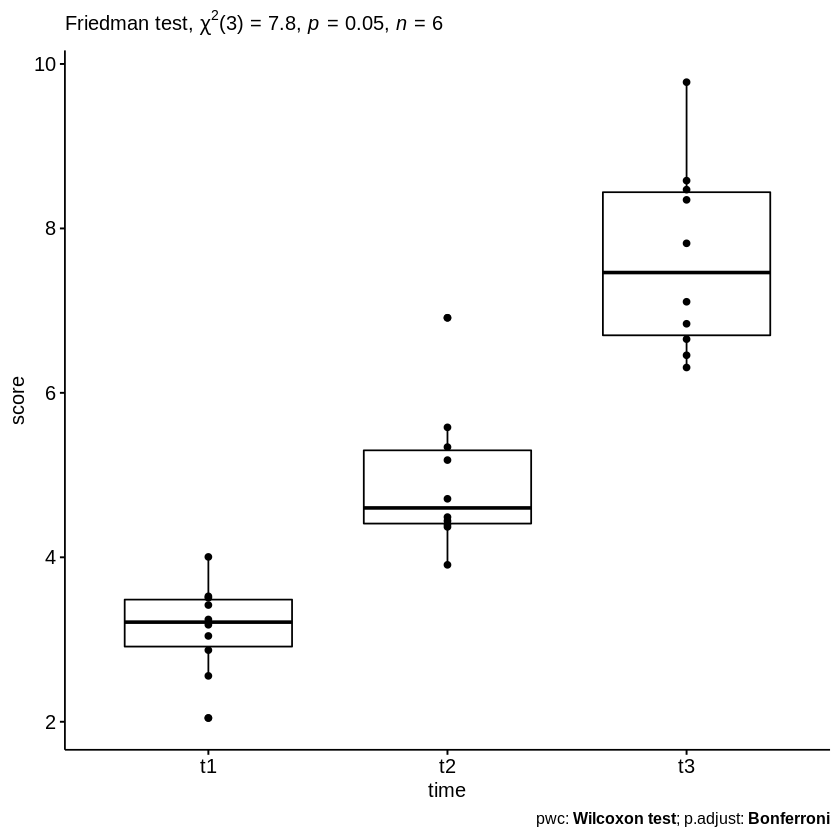

In [40]:
pwc <- pwc %>% add_xy_position(x = "time")
ggboxplot(selfesteem, x = "time", y = "score", add = "point") +
  stat_pvalue_manual(pwc, hide.ns = TRUE) +
  labs(
    subtitle = get_test_label(res.fried,  detailed = TRUE),
    caption = get_pwc_label(pwc)
  )